<a href="https://colab.research.google.com/github/jpgill86/JG20-analysis/blob/master/PSP_Analysis_(Shlomit_Tam_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
! pip install -q tdms2axg elephant
! pip install -q git+https://github.com/NeuralEnsemble/python-neo  # install 0.9.0.dev0 for unreleased fixes to AxographRawIO

# ignore error about elephant requirement for neo

     |████████████████████████████████| 2.1MB 2.7MB/s 
     |████████████████████████████████| 163kB 27.3MB/s 
     |████████████████████████████████| 92kB 8.8MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 2.1MB 19.8MB/s 
ERROR: elephant 0.7.0 has requirement neo<0.9.0,>=0.8.0, but you'll have neo 0.9.0.dev0 which is incompatible.


In [16]:
import os
import numpy as np
from tdms2axg import tdms2axg
import quantities as pq
import neo
from elephant.signal_processing import butter
from elephant.spike_train_generation import spike_extraction, threshold_detection, peak_detection
import matplotlib.pyplot as plt

In [4]:
data_root_dir = '/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data'
# data_root_dir = '/gdrive/Shared drives/LFI-neural-correlates/Shlomit (Avy attempt to upload)'

! echo -n "Total size: "
! du -sh "$data_root_dir" | sed -e "s/\s.*$//"

! echo -n "Number of directories: "
! ls "$data_root_dir" | wc -l

! echo -n "Number of EMPTY directories: "
! find "$data_root_dir" -type d -empty | wc -l

! echo -n "Number of TDMS files: "
! find "$data_root_dir" -type f -name *.tdms | wc -l

! echo
! echo "List of all TDMS files:"
! find "$data_root_dir" -type f -name *.tdms

Total size: du: cannot read directory '/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data/14062012_153012': Input/output error
1.4G
Number of directories: 1899
Number of EMPTY directories: 1798
Number of TDMS files: 160

List of all TDMS files:
/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data/06042016_181354/filtered_data (2).tdms
/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data/06042016_181354/filtered_data.tdms
/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data/06042016_181354/Voltage (2).tdms
/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data/06042016_181354/Voltage.tdms
/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data/06042016_170537/Voltage.tdms
/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data/06042016_170537/filtered_data (2).tdms
/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data/06042016_170537/filtered_data.tdms
/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data/06042016_170537/Vo

In [5]:
# data_root_dir = '/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data'
data_root_dir = '/gdrive/Shared drives/LFI-neural-correlates/Shlomit (Avy attempt to upload)'

! echo -n "Total size: "
! du -sh "$data_root_dir" | sed -e "s/\s.*$//"

! echo -n "Number of directories: "
! ls "$data_root_dir" | wc -l

! echo -n "Number of EMPTY directories: "
! find "$data_root_dir" -type d -empty | wc -l

! echo -n "Number of TDMS files: "
! find "$data_root_dir" -type f -name *.tdms | wc -l

# ! echo
# ! echo "List of all TDMS files:"
# ! find "$data_root_dir" -type f -name *.tdms

Total size: 44G
Number of directories: 4164
Number of EMPTY directories: 41
Number of TDMS files: 6515


In [6]:
# data_root_dir = '/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data'
# data_set_dir = '06052015_145449 (1)'

# # data_root_dir = '/gdrive/Shared drives/LFI-neural-correlates/Shlomit (Avy attempt to upload)'
# # data_set_dir = '06052015_145449'


# # data_root_dir = '/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data'
# # data_set_dir = '06042016_165223'


# tdms_file = os.path.join(data_root_dir, data_set_dir, 'Voltage.tdms')

# try:
#     axgx_file = tdms2axg(tdms_file, force=False, verbose=False)
# except OSError as e:
#     import re
#     m = re.match('error: output file exists, use force flag to overwrite: (.*)', e.args[0])
#     if m:
#         axgx_file = m.group(1)
#     else:
#         raise

In [7]:
# blk = neo.AxographIO(axgx_file).read_block()
# sigs = blk.segments[0].analogsignals

# # fix missing units (not in TDMS file)
# sigs = [sig*pq.V for sig in sigs]

# # better names
# sigs[0].name = 'Pre'
# sigs[1].name = 'Post'

# # filtered sigs
# # lowpass_freqs = [None, 30]  # Hz
# # lowpass_freqs = [200, 30]  # Hz
# # lowpass_freqs = [200, 60]  # Hz
# lowpass_freqs = [200, 200]  # Hz
# sigs_filtered = [butter(sig, lowpass_freq=lowpass_freq*pq.Hz) if lowpass_freq else None for sig, lowpass_freq in zip(sigs, lowpass_freqs)]

# # represent slowly shifting baseline
# sigs_baseline = [butter(sig, lowpass_freq=0.05*pq.Hz, order=2) for sig in sigs]

# # ignore warnings about "End of file reached unexpectedly" and "the default signal_group_mode will change"

In [8]:
# fig, axes = plt.subplots(len(sigs), 1, sharex=True, figsize=(20,10))
# for i, (sig, sig_filtered, baseline) in enumerate(zip(sigs, sigs_filtered, sigs_baseline)):
#     ax = axes[i]

#     # plot raw
#     ax.plot(sig.times, sig.rescale('mV').magnitude, label='raw')

#     # plot smoothed
#     if sig_filtered is not None: ax.plot(sig_filtered.times, sig_filtered.rescale('mV').magnitude, label='filtered')

#     # plot slowly shifting baseline
#     ax.plot(baseline.times, baseline.rescale('mV').magnitude, label='baseline', c='0.9')

#     ax.set_xlabel('Time (s)')
#     ax.set_ylabel(f'{sig.name} (mV)')
#     ax.set_xmargin(0)
#     ax.legend()

# plt.tight_layout()

In [9]:
# # # align by start of presynaptic cell stimulation
# # threshold = -25 * pq.mV
# # pulse_starts = threshold_detection(sigs[0], threshold=threshold)

# # align by peak of presynaptic voltage
# threshold = 10 * pq.mV
# pulse_starts = peak_detection(sigs[0], threshold=threshold)

# # extract waveforms
# extraction_interval = (-50, 500) * pq.ms
# spiketrains = []
# spiketrains_baseline = []
# for (sig, sig_filtered, baseline) in zip(sigs, sigs_filtered, sigs_baseline):
#     s = sig_filtered if sig_filtered is not None else sig
#     st = spike_extraction(s, time_stamps=pulse_starts, extr_interval=extraction_interval)
#     st.name = s.name
#     spiketrains.append(st)

#     s = baseline
#     st = spike_extraction(s, time_stamps=pulse_starts, extr_interval=extraction_interval)
#     st.name = s.name
#     spiketrains_baseline.append(st)

In [10]:
# # verify that the stimulation protocol is close to what we expect
# expected_diffs = np.array([
#     0.25, 0.25, 0.25, 0.25, 9,
#     0.25, 0.25, 0.25, 0.25, 9,
#     0.25, 0.25, 0.25, 0.25, 20.9,
#     10, 10, 10, 10, 10,
#     10, 10, 10, 10, 10,
#     10, 10, 10, 10]) # seconds
# assert pulse_starts.size == expected_diffs.size+1, f'an unexpected number of stimulation pulses was detected: found {pulse_starts.size}, expected {expected_diffs.size+1}'
# has_expected_diffs = np.allclose(np.diff(pulse_starts.times.magnitude), expected_diffs, rtol=1e-02, atol=1e-02)
# assert has_expected_diffs, f'stimulation pulse timing differs from expectation: {np.diff(pulse_starts.times.magnitude)}'

In [11]:
# xlims = [
#         [18.9, 20.5],  # first train
#         [28.9, 30.5],  # second train
#         [38.9, 40.5],  # third train
#     ]

# fig, axes = plt.subplots(len(sigs), len(xlims), squeeze=False, sharex='col', sharey='row', figsize=(20,10))
# for i, (sig, sig_filtered) in enumerate(zip(sigs, sigs_filtered)):
#     for j, xlim in enumerate(xlims):
#         ax = axes[i][j]

#         # plot raw
#         ax.plot(sig.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).times, sig.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).rescale('mV').magnitude, label='raw')

#         # plot smoothed
#         if sig_filtered is not None: ax.plot(sig_filtered.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).times, sig_filtered.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).rescale('mV').magnitude, label='filtered')

#         if i==len(sigs)-1: ax.set_xlabel('Time (s)')
#         if j==0: ax.set_ylabel(f'{sig.name} (mV)')
#         ax.set_xmargin(0)
#         ax.legend()

# plt.tight_layout()

In [12]:
# xlims = [
#         [60.5, 62],
#         [70.5, 72],
#         [80.5, 82],
#         [90.5, 92],
#         [100.5, 102],
#         [110.5, 112],
#         [120.5, 122],
#         [130.5, 132],
#         [140.5, 142],
#         [150.5, 152],
#         [160.5, 162],
#         [170.5, 172],
#         [180.5, 182],
#         [190.5, 192],
#         [200.5, 202],
#     ]

# fig, axes = plt.subplots(len(sigs), len(xlims), squeeze=False, sharex='col', sharey='row', figsize=(20,10))
# for i, (sig, sig_filtered) in enumerate(zip(sigs, sigs_filtered)):
#     for j, xlim in enumerate(xlims):
#         ax = axes[i][j]

#         # plot raw
#         ax.plot(sig.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).times - 10*pq.s*j, sig.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).rescale('mV').magnitude, label='raw')

#         # plot smoothed
#         if sig_filtered is not None: ax.plot(sig_filtered.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).times - 10*pq.s*j, sig_filtered.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).rescale('mV').magnitude, label='filtered')

#         if i==len(sigs)-1: ax.set_xlabel('Time (s)')
#         if j==0: ax.set_ylabel(f'{sig.name} (mV)')
#         ax.set_xmargin(0)
#         # ax.legend()

# plt.tight_layout(pad=0)

In [13]:
# xlims = [
#         [60.5, 62],
#         [70.5, 72],
#         [80.5, 82],
#         [90.5, 92],
#         [100.5, 102],
#         [110.5, 112],
#         [120.5, 122],
#         [130.5, 132],
#         [140.5, 142],
#         [150.5, 152],
#         [160.5, 162],
#         [170.5, 172],
#         [180.5, 182],
#         [190.5, 192],
#         [200.5, 202],
#     ]

# colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, len(xlims)))

# # fig, axes = plt.subplots(len(sigs), len(xlims), squeeze=False, sharex='col', sharey='row', figsize=(20,10))
# # for i, (sig, sig_filtered) in enumerate(zip(sigs, sigs_filtered)):
# #     for j, xlim in enumerate(xlims):
# #         ax = axes[i][j]
# fig, axes = plt.subplots(len(sigs), 1, squeeze=False, sharex='col', sharey='row', figsize=(20,10))
# for i, (sig, sig_filtered) in enumerate(zip(sigs, sigs_filtered)):
#     for j, xlim in enumerate(xlims):
#         ax = axes[i][0]

#         # plot raw
#         ax.plot(sig.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).times - 10*pq.s*j, sig.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).rescale('mV').magnitude, label='raw', color=colors[j])

#         # plot smoothed
#         # if sig_filtered is not None: ax.plot(sig_filtered.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).times - 10*pq.s*j, sig_filtered.time_slice(xlim[0]*pq.s, xlim[1]*pq.s).rescale('mV').magnitude, label='filtered', color=colors[j])

#         if i==len(sigs)-1: ax.set_xlabel('Time (s)')
#         if j==0: ax.set_ylabel(f'{sig.name} (mV)')
#         ax.set_xmargin(0)
#         # ax.legend()

# plt.xlim([60.818, 60.818+0.25]) ################
# plt.tight_layout()

In [14]:
# fig, axes = plt.subplots(len(spiketrains), 1, squeeze=False, sharex='col', sharey='row', figsize=(20,10))
# for i, st in enumerate(spiketrains):
#     wfs = st.waveforms[0:5]
#     wf_times = np.arange(st.left_sweep.rescale('ms'), st.right_sweep.rescale('ms'), st.sampling_period.rescale('ms')) * pq.ms
#     colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, len(wfs)))
#     for j, wf in enumerate(wfs):
#         ax = axes[i][0]
#         ax.grid(True)

#         # plot waveform
#         wf_post = wf.rescale('mV').flatten()
#         ax.plot(wf_times, wf.rescale('mV').flatten(), color=colors[j])

#         if i==len(sigs)-1: ax.set_xlabel('Time (ms)')
#         if j==0: ax.set_ylabel(f'{st.name} (mV)')
#         ax.set_xmargin(0)
#         # ax.legend()

# plt.tight_layout()

End of file reached unexpectedly while parsing metadata, will attempt to continue
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
/usr/local/lib/python3.6/dist-packages/elephant/spike_train_generation.py:85: UserWarning: Waveforms overlap.
  warnings.warn("Waveforms overlap.", UserWarning)


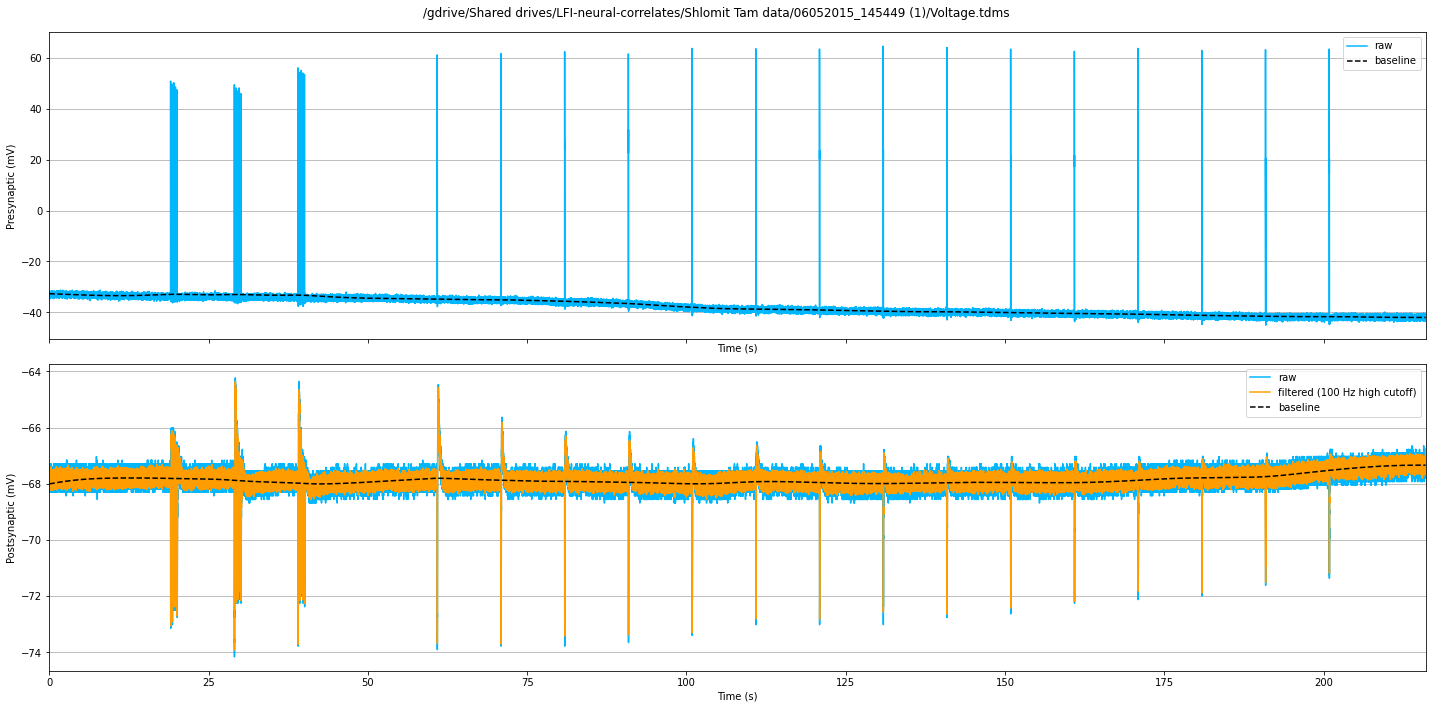

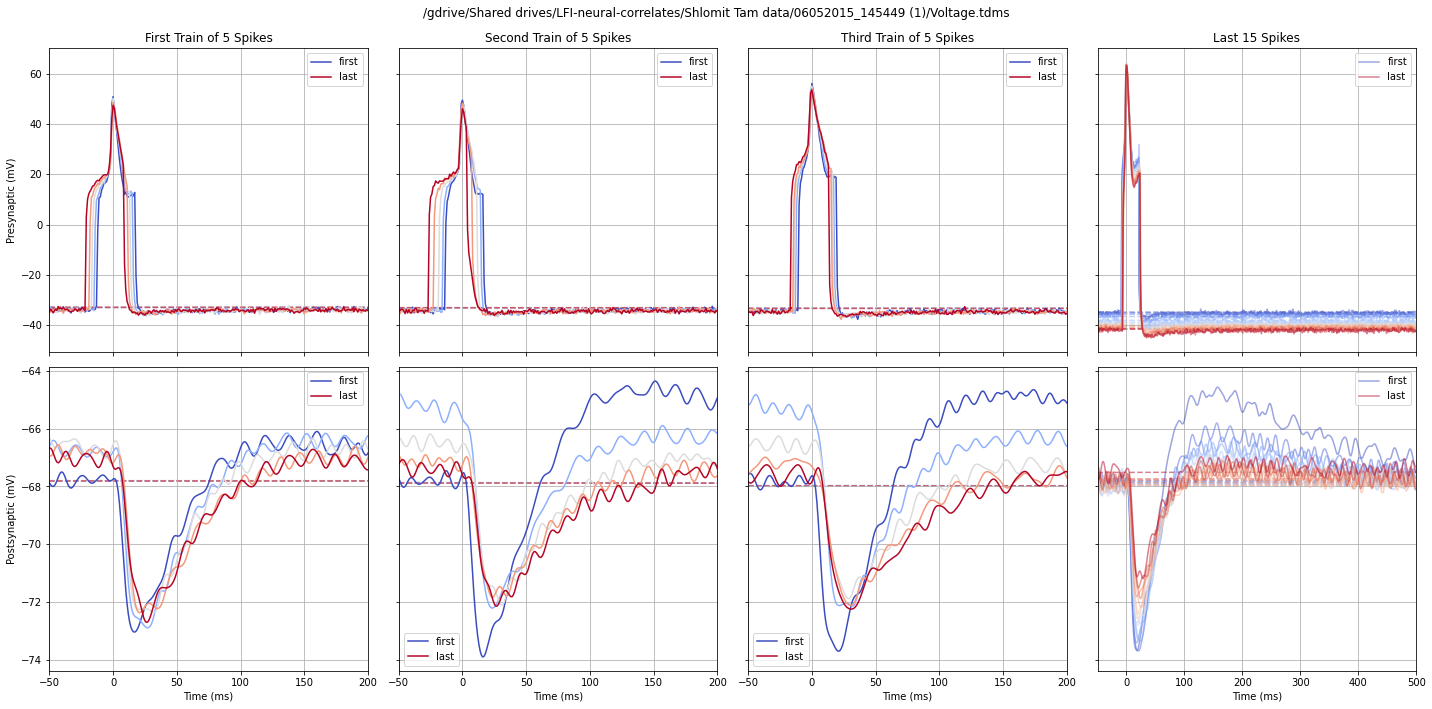

In [17]:
data_root_dir = '/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data'
data_set_dir = '06052015_145449 (1)'

# data_root_dir = '/gdrive/Shared drives/LFI-neural-correlates/Shlomit (Avy attempt to upload)'
# data_set_dir = '06052015_145449'


# data_root_dir = '/gdrive/Shared drives/LFI-neural-correlates/Shlomit Tam data'
# data_set_dir = '06042016_165223'


tdms_file = os.path.join(data_root_dir, data_set_dir, 'Voltage.tdms')

try:
    axgx_file = tdms2axg(tdms_file, force=False, verbose=False)
except OSError as e:
    import re
    m = re.match('error: output file exists, use force flag to overwrite: (.*)', e.args[0])
    if m:
        axgx_file = m.group(1)
    else:
        raise




blk = neo.AxographIO(axgx_file).read_block()
sigs = blk.segments[0].analogsignals

# fix missing units (not in TDMS file)
sigs = [sig*pq.V for sig in sigs]

# better names
sigs[0].name = 'Presynaptic'
sigs[1].name = 'Postsynaptic'

# filtered sigs
# lowpass_freqs = [200, 30]  # Hz
# lowpass_freqs = [None, 30]  # Hz
# lowpass_freqs = [None, 60]  # Hz
lowpass_freqs = [None, 100]  # Hz
# lowpass_freqs = [None, 200]  # Hz
# lowpass_freqs = [None, None]  # Hz
sigs_filtered = [butter(sig, lowpass_freq=lowpass_freq*pq.Hz) if lowpass_freq else None for sig, lowpass_freq in zip(sigs, lowpass_freqs)]

# represent slowly shifting baseline
superlowpass_freq = 0.05  # Hz
sigs_baseline = [butter(sig, lowpass_freq=superlowpass_freq*pq.Hz, order=2) for sig in sigs]




fig, axes = plt.subplots(len(sigs), 1, sharex=True, figsize=(20,10))
for i, (sig, sig_filtered, baseline) in enumerate(zip(sigs, sigs_filtered, sigs_baseline)):
    ax = axes[i]
    ax.grid(axis='y')

    # plot raw
    ax.plot(sig.times, sig.rescale('mV').magnitude, label='raw', c='#00b7ff')

    # plot smoothed
    if sig_filtered is not None: ax.plot(sig_filtered.times, sig_filtered.rescale('mV').magnitude, label=f'filtered ({lowpass_freqs[i]} Hz high cutoff)', c='#ff9d00')

    # plot slowly shifting baseline
    ax.plot(baseline.times, baseline.rescale('mV').magnitude, label='baseline', ls='--', c='k')

    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'{sig.name} (mV)')
    ax.set_xmargin(0)
    ax.legend()

plt.suptitle(tdms_file)
plt.tight_layout(rect=(0, 0, 1, 0.96))
fig.savefig(f'{data_set_dir}_continuous.png')




# # align by start of presynaptic cell stimulation
# threshold = -25 * pq.mV
# pulse_starts = threshold_detection(sigs[0], threshold=threshold)

# align by peak of presynaptic voltage
threshold = 10 * pq.mV
pulse_starts = peak_detection(sigs[0], threshold=threshold)

# extract waveforms
extraction_interval = (-50, 500) * pq.ms
spiketrains = []
spiketrains_baseline = []
for (sig, sig_filtered, baseline) in zip(sigs, sigs_filtered, sigs_baseline):
    s = sig_filtered if sig_filtered is not None else sig
    st = spike_extraction(s, time_stamps=pulse_starts, extr_interval=extraction_interval)
    st.name = s.name
    spiketrains.append(st)

    s = baseline
    st = spike_extraction(s, time_stamps=pulse_starts, extr_interval=extraction_interval)
    st.name = s.name
    spiketrains_baseline.append(st)


# verify that the stimulation protocol is close to what we expect
expected_diffs = np.array([
    0.25, 0.25, 0.25, 0.25, 9,
    0.25, 0.25, 0.25, 0.25, 9,
    0.25, 0.25, 0.25, 0.25, 20.9,
    10, 10, 10, 10, 10,
    10, 10, 10, 10, 10,
    10, 10, 10, 10]) # seconds
assert pulse_starts.size == expected_diffs.size+1, f'an unexpected number of stimulation pulses was detected: found {pulse_starts.size}, expected {expected_diffs.size+1}'
has_expected_diffs = np.allclose(np.diff(pulse_starts.times.magnitude), expected_diffs, rtol=1e-02, atol=1e-02)
assert has_expected_diffs, f'stimulation pulse timing differs from expectation: {np.diff(pulse_starts.times.magnitude)}'


wf_sets = [slice(0, 5), slice(5, 10), slice(10, 15), slice(15, 30)]
wf_xlims = [(-50, 200), (-50, 200), (-50, 200), (-50, 500)]
wf_titles = ['First Train of 5 Spikes', 'Second Train of 5 Spikes', 'Third Train of 5 Spikes', 'Last 15 Spikes']

fig, axes = plt.subplots(len(spiketrains), len(wf_sets), squeeze=False, sharex='col', sharey='row', figsize=(20,10))
for j, (wf_set, xlim, title) in enumerate(zip(wf_sets, wf_xlims, wf_titles)):
    for i, st in enumerate(spiketrains):
        wfs = st.waveforms[wf_set]
        baselines = spiketrains_baseline[i].waveforms[wf_set]
        wf_times = np.arange(st.left_sweep.rescale('ms'), st.right_sweep.rescale('ms'), st.sampling_period.rescale('ms')) * pq.ms
        colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, len(wfs)))

        ax = axes[i][j]
        ax.grid(True)
        ax.set_xlim(xlim[0], xlim[1])
        if i==0:
            ax.set_title(title)

        # plot the median membrane potential for the entire record
        # ax.axhline(np.median(sigs[i].rescale('mV').magnitude), ls='--', c='gray')

        for k, wf in enumerate(wfs):

            if k == 0:
                label = 'first'
            elif k == len(wfs)-1:
                label = 'last'
            else:
                label = None
            
            # plot waveform
            alpha = 0.5 if j==len(wf_sets)-1 else 1
            ax.plot(wf_times, wf.rescale('mV').flatten(), label=label, color=colors[k], alpha=alpha)

            # plot baseline
            ax.plot(wf_times, baselines[k].rescale('mV').flatten(), ls='--', color=colors[k], alpha=0.5, zorder=0)

            if i==len(spiketrains)-1: ax.set_xlabel('Time (ms)')
            if j==0: ax.set_ylabel(f'{st.name} (mV)')
            ax.set_xmargin(0)
            ax.legend()

plt.suptitle(tdms_file)
plt.tight_layout(rect=(0, 0, 1, 0.96))
fig.savefig(f'{data_set_dir}_aligned.png')